<h1 align=center><font size = 5> Classification: Logistic Regression with Python</font></h1>

### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### About dataset
We’ll use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The data set includes information about:

- **Customers who left within the last month** – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


### Load Data From CSV File  

In [ ]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/gbrbreen1/MachineLearningUsingPython/main/ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection

Lets select some features for the modeling. Also we **change the target data type to be integer**, as it is a requirement  by the skitlearn algorithm:

In [ ]:
# select the feature set (the predictors) and change the target data type to be integer (as this is required by sikit-learn)
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
# check the dimensions of the dataframe
churn_df.shape





(200, 10)

In [ ]:
# define X (predictors) and y (target) for the dataset
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [ ]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

**Using the raw data without normalization**, This means the customer with ==>

 ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of [ 11.,  33.,   7., 136.,   5.,   5.,   0.] in the first row of the array ==> has a churn value of 1 ==> He is in class 1

 ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of [ 23.,  30.,   9.,  30.,   1.,   2.,   0.] in the third row of the array ==> has a churn value of 0 ==> He is in class 0

In [ ]:
# normalize the dataset to be in the normal distribution
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [ ]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

**After normalization**, this means the customer with ==>

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of [-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 , -0.58477841, -0.85972695] in the first row of the X array ==> has a churn value of 1 (in the y array) ==> He is in class 1

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853, -0.92053635, -0.85972695] in the third row of the X array ==> has a churn value of 0 (in the y array) ==> He is in class 0

## Train/Test dataset

In [ ]:
# split our dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modeling (Logistic Regression with Scikit-learn)

In [35]:
# create the model (using liblinear solver and inverse of regularization strength of 0.03) and fit it with the training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
logReg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can predict using our test set:

In [ ]:
X_test[:9]

array([[ 0.53250132, -0.08931261,  0.42929083,  0.40488962,  0.91629947,
         0.19865678,  1.16316   ],
       [ 0.81044894, -0.62595491, -1.05102238, -0.11810256, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.25501694, -1.00927084, -1.05102238, -0.4303367 , -1.42318853,
        -0.24902047, -0.85972695],
       [ 0.76412434, -0.1659758 , -0.55758464,  0.34244279,  0.13647013,
         0.87017266, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-1.41313204,  0.44732969, -0.4588971 , -0.22738451, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.48663996, -0.93260766, -0.261522  , -0.15713183,  0.91629947,
        -1.03245566, -0.85972695],
       [ 0.34720291, -0.93260766, -0.75495974, -0.32886061, -1.42318853,
         0.31057609, -0.85972695],
       [-1.41313204, -0.7026181 , -0.55758464, -0.32886061,  0.91629947,
        -0.80861704,  1.16316   ]])

In [ ]:
yhat = logReg.predict(X_test)
yhat[:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

This means that the customer with  ==>

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of the values shown in the first row of the test data array has been classified by the model to 0 (as shown in the yhat array) ==> has a churn value of 0 ==> He is in class 0

['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'] of the values shown in the last row of the test data array has been classified by the model to 1 (as shown in the yhat array) ==> has a churn value of 1 ==> he is in class 1

In [ ]:
# check the accuracy of the  for predicting the test data
logReg.score(X_test, y_test)

0.75

The accuracy of the model is 0.75 (the perfect accuracy is 1). this means the model requires enhancements.

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [ ]:
X_test[:5]

array([[ 0.53250132, -0.08931261,  0.42929083,  0.40488962,  0.91629947,
         0.19865678,  1.16316   ],
       [ 0.81044894, -0.62595491, -1.05102238, -0.11810256, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.25501694, -1.00927084, -1.05102238, -0.4303367 , -1.42318853,
        -0.24902047, -0.85972695],
       [ 0.76412434, -0.1659758 , -0.55758464,  0.34244279,  0.13647013,
         0.87017266, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695]])

In [ ]:
yhat_prob = logReg.predict_proba(X_test)
yhat_prob[:5]

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161]])

This means the propability of the customer in the first row of the X-test array equals the value of the first column (to be in class 1) & the value of the second column to be in class 0 (and not in class 1)

## Evaluation

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In our true real world data, We can see that we have a total of 40 cases: 15 cases who are class 1 (this is the data we have without any prediction - the truth) and 25 are class 0.

In [ ]:
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In our predicted data, We can see that we have a total of 40 cases: 4 cases were predicted as class 1 and 36 were predicted as class 0.

TO conclude, there is a difference between the truth and the model, let us check this using the below accuracy evaluation methods.

#### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [ ]:
# try jaccard index for accuracy evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

We know before that the accuracy of the model is 0.75 (the perfect accuracy is 1). Here, we can see that the Jaccard index is the same value (the accuracy)

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [ ]:
# try the confusion matrix for accuracy evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


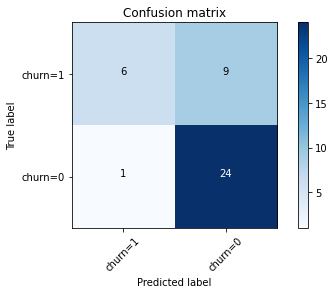

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them wrongly as 0. 

It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. 

A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  **In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.** ==> is this also valid in multiclass classification.

In [29]:
# print the classification report
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [30]:
# another way to create the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
cm



array([[24,  1],
       [ 9,  6]])

Text(69.0, 0.5, 'Truth')

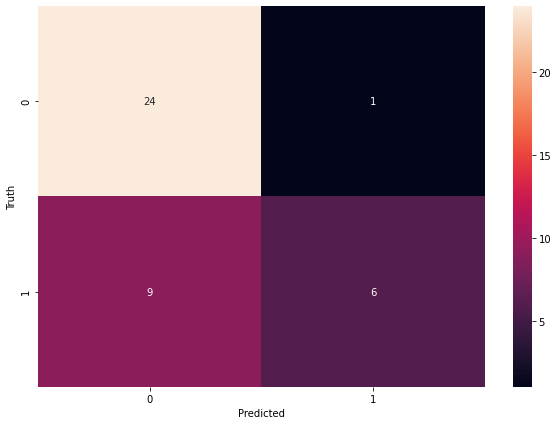

In [31]:
# show the confusion matrix

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
**Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.**


In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

In [34]:
#  build Logistic Regression model using different solver and regularization values
logReg2 = LogisticRegression(C=0.03, solver='sag').fit(X_train,y_train)
yhat_prob2 = logReg2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))



LogLoss: : 0.59
